In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
phone =  pd.read_csv("/Users/blackrose/Desktop/cw_ji/dataset_2.csv")
phone

,Smartphone,Gender,Age,Honesty-Humility,Emotionality,Extraversion,Agreeableness,Conscientiousness,Openness,Phone as status object,Social Economic Status,Time owned current phone
0,iPhone,male,24,3.3,2.4,3.3,3.4,3.1,3.3,1.8,6.0,18.0
1,iPhone,male,39,3.5,2.6,4.3,4,3.2,4.5,2.0,13.0,2.0
2,iPhone,male,31,3.9,2.4,2.7,4.1,3.7,4.9,1.3,2.0,22.0
3,iPhone,male,22,3.0,3,2.8,2.4,2.2,2.5,2.7,4.0,2.0
4,iPhone,male,43,3.6,1.8,2.0,2.6,3.9,3.1,1.2,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
527,iPhone,other,28,3.0,2.7,1.9,2.6,3.7,4.5,2.0,3.0,4.0
528,Android,other,25,2.4,NaN,4.1,3.2,1.8,4.2,1.8,NaN,6.0
529,iPhone,other,18,2.4,3.8,3.7,3.2,3.1,4.1,2.7,6.0,10.0
530,Android,other,21,2.2,4.3,2.2,2,3.6,2.9,2.7,7.0,24.0


สิ่งที่คุณเขียนมาคือ **รายการของตัวแปร (Variables)** ที่มักใช้ในงานวิจัยเชิงจิตวิทยาหรือพฤติกรรมผู้บริโภค โดยอาจเป็นการศึกษาความสัมพันธ์ระหว่างลักษณะนิสัย บุคลิกภาพ กับพฤติกรรมการใช้สมาร์ตโฟน หรือการมองว่าโทรศัพท์เป็นสัญลักษณ์สถานะ เป็นต้น

ขออธิบายแต่ละตัวแปรแบบง่าย ๆ นะครับ:

---

### 🔢 ตัวแปรพื้นฐาน
- **Smartphone** – รุ่นหรือประเภทของสมาร์ตโฟนที่ใช้ (เช่น iPhone, Samsung ฯลฯ)
- **Gender** – เพศ
- **Age** – อายุ

---

### 🧠 Personality (HEXACO Model) – บุคลิกภาพ 6 ด้าน
1. **Honesty-Humility** – ความซื่อสัตย์ ถ่อมตน ไม่หลอกลวง
2. **Emotionality** – ความอ่อนไหวทางอารมณ์ เช่น ความวิตกกังวล ความเห็นอกเห็นใจ
3. **Extraversion** – ความชอบเข้าสังคม ร่าเริง เปิดเผย
4. **Agreeableness** – ความมีน้ำใจ ประนีประนอม
5. **Conscientiousness** – ความมีวินัย รอบคอบ รับผิดชอบ
6. **Openness** – ความเปิดกว้างทางประสบการณ์ ชอบสิ่งใหม่ ๆ ศิลปะ ความคิดสร้างสรรค์

---

### 💎 ตัวแปรเกี่ยวกับทัศนคติและสถานะ
- **Phone as status object** – การมองว่าโทรศัพท์เป็นสัญลักษณ์ของสถานะทางสังคม
- **Socioeconomic status** – สถานะทางเศรษฐกิจและสังคม (เช่น รายได้ การศึกษา)

---

### ⏱️ การใช้โทรศัพท์
- **Time owned current phone (months)** – ระยะเวลาที่ใช้โทรศัพท์เครื่องปัจจุบัน (หน่วย: เดือน)

---

หากคุณต้องการนำข้อมูลเหล่านี้ไปใช้ทำแบบสอบถาม วิเคราะห์ข้อมูล หรือเขียนรายงานวิจัย บอกได้เลยนะครับ ผมช่วยได้ทุกขั้นตอน 😊

In [41]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Smartphone                532 non-null    object 
 1   Gender                    532 non-null    object 
 2   Age                       529 non-null    object 
 3   Honesty-Humility          527 non-null    float64
 4   Emotionality              527 non-null    object 
 5   Extraversion              531 non-null    float64
 6   Agreeableness             528 non-null    object 
 7   Conscientiousness         531 non-null    float64
 8   Openness                  530 non-null    object 
 9   Phone as status object    528 non-null    float64
 10  Social Economic Status    528 non-null    float64
 11  Time owned current phone  524 non-null    float64
dtypes: float64(6), object(6)
memory usage: 50.0+ KB


In [42]:
phone['Openness'] = pd.to_numeric(phone['Openness'], errors='coerce')
phone['Agreeableness'] = pd.to_numeric(phone['Agreeableness'], errors='coerce')
phone['Emotionality'] = pd.to_numeric(phone['Emotionality'], errors='coerce')
phone['Age'] = pd.to_numeric(phone['Age'], errors='coerce')


In [43]:
phone

,Smartphone,Gender,Age,Honesty-Humility,Emotionality,Extraversion,Agreeableness,Conscientiousness,Openness,Phone as status object,Social Economic Status,Time owned current phone
0,iPhone,male,24.0,3.3,2.4,3.3,3.4,3.1,3.3,1.8,6.0,18.0
1,iPhone,male,39.0,3.5,2.6,4.3,4.0,3.2,4.5,2.0,13.0,2.0
2,iPhone,male,31.0,3.9,2.4,2.7,4.1,3.7,4.9,1.3,2.0,22.0
3,iPhone,male,22.0,3.0,3.0,2.8,2.4,2.2,2.5,2.7,4.0,2.0
4,iPhone,male,43.0,3.6,1.8,2.0,2.6,3.9,3.1,1.2,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
527,iPhone,other,28.0,3.0,2.7,1.9,2.6,3.7,4.5,2.0,3.0,4.0
528,Android,other,25.0,2.4,NaN,4.1,3.2,1.8,4.2,1.8,NaN,6.0
529,iPhone,other,18.0,2.4,3.8,3.7,3.2,3.1,4.1,2.7,6.0,10.0
530,Android,other,21.0,2.2,4.3,2.2,2.0,3.6,2.9,2.7,7.0,24.0


In [44]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Smartphone                532 non-null    object 
 1   Gender                    532 non-null    object 
 2   Age                       528 non-null    float64
 3   Honesty-Humility          527 non-null    float64
 4   Emotionality              525 non-null    float64
 5   Extraversion              531 non-null    float64
 6   Agreeableness             525 non-null    float64
 7   Conscientiousness         531 non-null    float64
 8   Openness                  528 non-null    float64
 9   Phone as status object    528 non-null    float64
 10  Social Economic Status    528 non-null    float64
 11  Time owned current phone  524 non-null    float64
dtypes: float64(10), object(2)
memory usage: 50.0+ KB


In [45]:
phone.isnull().sum()

Smartphone                  0
Gender                      0
Age                         4
Honesty-Humility            5
Emotionality                7
Extraversion                1
Agreeableness               7
Conscientiousness           1
Openness                    4
Phone as status object      4
Social Economic Status      4
Time owned current phone    8
dtype: int64

In [46]:
null_data = phone[phone.isnull().any(axis=1)]
null_data

,Smartphone,Gender,Age,Honesty-Humility,Emotionality,Extraversion,Agreeableness,Conscientiousness,Openness,Phone as status object,Social Economic Status,Time owned current phone
8,iPhone,male,25.0,NaN,3.1,3.6,3.5,3.4,2.6,2.8,7.0,16.0
12,iPhone,male,53.0,3.4,2.0,3.3,3.3,3.0,4.4,NaN,3.0,16.0
15,iPhone,male,27.0,3.8,3.0,NaN,3.4,4.1,3.5,2.2,7.0,2.0
20,iPhone,male,35.0,NaN,3.1,2.9,3.4,3.7,3.6,2.8,7.0,6.0
37,iPhone,male,NaN,3.1,2.8,3.4,4.4,4.2,3.8,2.3,6.0,29.0
66,BlackBerry,male,56.0,3.2,2.7,2.8,2.6,3.6,3.6,NaN,6.0,18.0
94,Android,male,32.0,4.1,2.3,3.4,2.7,3.5,NaN,2.0,8.0,18.0
96,Android,male,50.0,NaN,3.6,3.3,2.5,3.5,3.6,1.8,7.0,12.0
116,Android,male,19.0,3.6,2.2,3.4,NaN,3.0,3.1,1.7,5.0,6.0
120,Android,male,NaN,3.3,3.2,4.0,2.4,3.1,4.4,1.8,6.0,8.0


In [47]:
null_data.shape

(40, 12)

In [48]:
mean_age = phone['Age'].mean()
mean_hh = phone['Honesty-Humility'].mean()

mean_emo = phone['Emotionality'].mean()

mean_ex = phone['Extraversion'].mean()

mean_agree = phone['Agreeableness'].mean()

mean_cons = phone['Conscientiousness'].mean()

mean_open = phone['Openness'].mean()

mean_phonest = phone['Phone as status object'].mean()
mean_ses = phone['Social Economic Status'].mean()

mean_time = phone['Time owned current phone'].mean()





In [49]:
phone['Age'].fillna(mean_age, inplace=True)
phone['Honesty-Humility'].fillna(mean_hh, inplace=True)
phone['Emotionality'].fillna(mean_emo, inplace=True)
phone['Extraversion'].fillna(mean_ex, inplace=True)
phone['Agreeableness'].fillna(mean_agree, inplace=True)
phone['Conscientiousness'].fillna(mean_cons, inplace=True)
phone['Openness'].fillna(mean_open, inplace=True)
phone['Phone as status object'].fillna(mean_phonest, inplace=True)
phone['Social Economic Status'].fillna(mean_ses, inplace=True)
phone['Time owned current phone'].fillna(mean_time, inplace=True)


/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_30724/3870938880.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  phone['Age'].fillna(mean_age, inplace=True)
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_30724/3870938880.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [50]:
phone.isnull().sum()

Smartphone                  0
Gender                      0
Age                         0
Honesty-Humility            0
Emotionality                0
Extraversion                0
Agreeableness               0
Conscientiousness           0
Openness                    0
Phone as status object      0
Social Economic Status      0
Time owned current phone    0
dtype: int64

In [51]:
phone

,Smartphone,Gender,Age,Honesty-Humility,Emotionality,Extraversion,Agreeableness,Conscientiousness,Openness,Phone as status object,Social Economic Status,Time owned current phone
0,iPhone,male,24.0,3.3,2.40000,3.3,3.4,3.1,3.3,1.8,6.000000,18.0
1,iPhone,male,39.0,3.5,2.60000,4.3,4.0,3.2,4.5,2.0,13.000000,2.0
2,iPhone,male,31.0,3.9,2.40000,2.7,4.1,3.7,4.9,1.3,2.000000,22.0
3,iPhone,male,22.0,3.0,3.00000,2.8,2.4,2.2,2.5,2.7,4.000000,2.0
4,iPhone,male,43.0,3.6,1.80000,2.0,2.6,3.9,3.1,1.2,3.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
527,iPhone,other,28.0,3.0,2.70000,1.9,2.6,3.7,4.5,2.0,3.000000,4.0
528,Android,other,25.0,2.4,3.36381,4.1,3.2,1.8,4.2,1.8,6.028409,6.0
529,iPhone,other,18.0,2.4,3.80000,3.7,3.2,3.1,4.1,2.7,6.000000,10.0
530,Android,other,21.0,2.2,4.30000,2.2,2.0,3.6,2.9,2.7,7.000000,24.0


In [52]:
phone.describe()

,Age,Honesty-Humility,Emotionality,Extraversion,Agreeableness,Conscientiousness,Openness,Phone as status object,Social Economic Status,Time owned current phone
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,30.035985,3.441176,3.363810,3.245009,3.140381,3.546139,3.462689,2.258523,6.028409,12.101145
std,17.416809,0.619240,0.694737,0.663459,0.612770,0.609806,0.627336,0.584066,1.663032,9.945391
min,17.000000,1.700000,1.100000,1.400000,1.400000,1.500000,1.600000,1.000000,1.000000,0.000000
25%,19.000000,3.000000,2.900000,2.800000,2.700000,3.200000,3.000000,1.800000,5.000000,5.000000
50%,23.000000,3.441176,3.400000,3.300000,3.140381,3.600000,3.500000,2.200000,6.000000,11.000000
75%,36.000000,3.900000,3.800000,3.700000,3.600000,4.000000,3.900000,2.700000,7.000000,18.000000
max,223.000000,4.900000,5.000000,4.700000,4.700000,5.000000,4.900000,3.800000,16.000000,99.000000


In [53]:
phone[phone['Age'] > 100]


,Smartphone,Gender,Age,Honesty-Humility,Emotionality,Extraversion,Agreeableness,Conscientiousness,Openness,Phone as status object,Social Economic Status,Time owned current phone
26,iPhone,male,223.0,2.4,3.0,2.8,3.4,3.7,3.0,3.2,7.0,1.0
184,iPhone,female,174.0,4.6,3.4,2.3,3.6,3.3,4.5,1.3,2.0,26.0
517,Android,male,103.0,3.7,4.0,2.0,2.0,3.0,3.0,3.0,5.0,24.0


In [54]:
import pandas as pd

# เผื่อยังไม่ได้แปลง object → number
numeric_cols = phone.select_dtypes(include='number').columns
for col in numeric_cols:
    phone[col] = pd.to_numeric(phone[col], errors='coerce')

# ใช้ IQR method
def remove_outliers_iqr(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # ลบแถวที่ outlier ในแต่ละคอลัมน์
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# ลบ outliers จากทุกคอลัมน์ตัวเลข
numeric_cols = phone.select_dtypes(include='number').columns
phone_cleaned = remove_outliers_iqr(phone, numeric_cols)

# ตรวจสอบว่าเหลือกี่แถว
print(f"ก่อนลบ: {phone.shape[0]} แถว")
print(f"หลังลบ: {phone_cleaned.shape[0]} แถว")


ก่อนลบ: 532 แถว
หลังลบ: 477 แถว


In [55]:
phone_cleaned

,Smartphone,Gender,Age,Honesty-Humility,Emotionality,Extraversion,Agreeableness,Conscientiousness,Openness,Phone as status object,Social Economic Status,Time owned current phone
0,iPhone,male,24.0,3.3,2.4,3.3,3.4,3.1,3.3,1.8,6.0,18.0
2,iPhone,male,31.0,3.9,2.4,2.7,4.1,3.7,4.9,1.3,2.0,22.0
3,iPhone,male,22.0,3.0,3.0,2.8,2.4,2.2,2.5,2.7,4.0,2.0
4,iPhone,male,43.0,3.6,1.8,2.0,2.6,3.9,3.1,1.2,3.0,4.0
5,iPhone,male,20.0,2.7,3.0,3.7,2.8,3.0,3.8,1.7,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
525,iPhone,other,23.0,3.6,3.7,3.7,3.8,4.5,3.9,2.2,6.0,13.0
527,iPhone,other,28.0,3.0,2.7,1.9,2.6,3.7,4.5,2.0,3.0,4.0
529,iPhone,other,18.0,2.4,3.8,3.7,3.2,3.1,4.1,2.7,6.0,10.0
530,Android,other,21.0,2.2,4.3,2.2,2.0,3.6,2.9,2.7,7.0,24.0


In [174]:
phone_cleaned[phone_cleaned['Age'] > 100]

,Gender,Age,Honesty-Humility,Emotionality,Extraversion,Agreeableness,Conscientiousness,Openness,Phone as status object,Social Economic Status,Time owned current phone,smartphone_Android,smartphone_BlackBerry,smartphone_iPhone


/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_30724/5822118.py:12: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_30724/5822118.py:12: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_30724/5822118.py:12: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_30724/5822118.py:12: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_30724/5822118.py:12: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_3

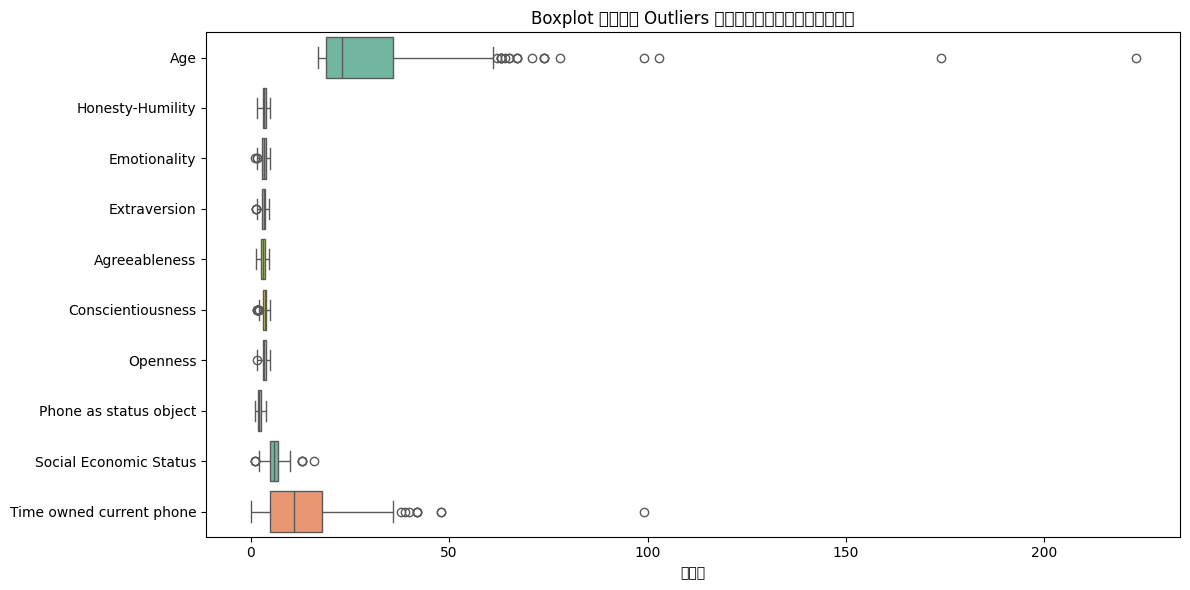

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numeric_cols = phone.select_dtypes(include='number').columns

# วาด boxplot แบบรวมทุกตัวแปร
plt.figure(figsize=(12, 6))
sns.boxplot(data=phone[numeric_cols], orient='h', palette='Set2')
plt.title("Boxplot แสดง Outliers ของแต่ละตัวแปร")
plt.xlabel("ค่า")
plt.tight_layout()
plt.show()


In [57]:
from sklearn.preprocessing import StandardScaler

# เลือกเฉพาะคอลัมน์ตัวเลข
numeric_cols = phone.select_dtypes(include='number').columns

# ทำ Standardization
scaler = StandardScaler()
phone_scaled = phone.copy()
phone_scaled[numeric_cols] = scaler.fit_transform(phone[numeric_cols])


/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_30724/2033654454.py:8: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_30724/2033654454.py:8: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_30724/2033654454.py:8: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_30724/2033654454.py:8: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_30724/2033654454.py:8: UserWarning: Glyph 3586 (\N{THAI CHARACTER KHO KHAI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ip

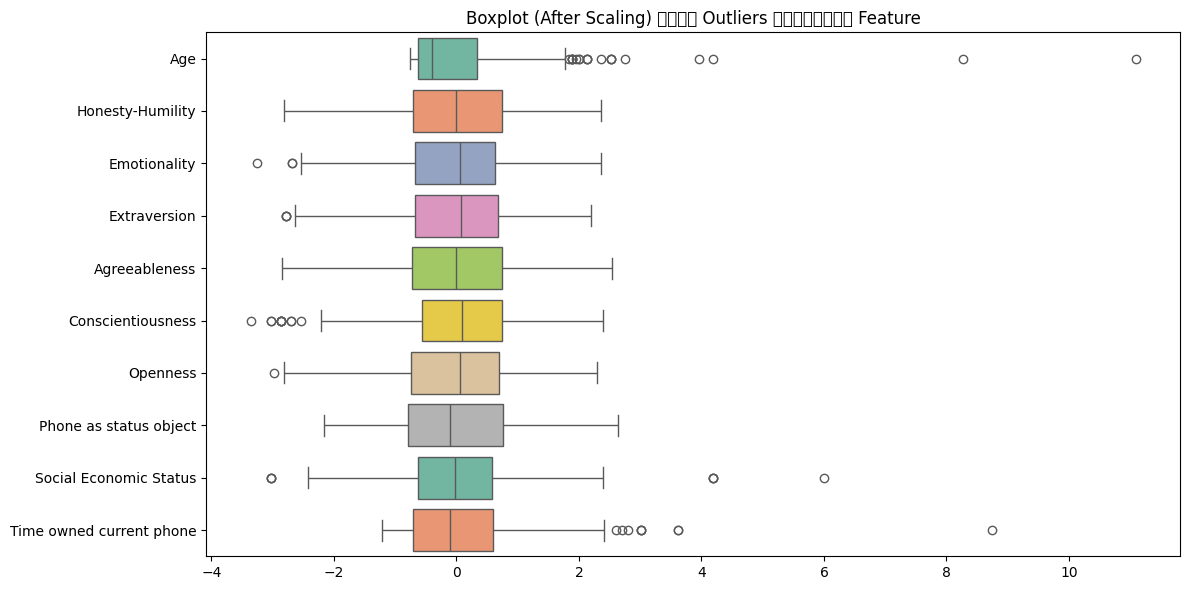

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# ใช้ phone_scaled หรือ phone_normalized
plt.figure(figsize=(12, 6))
sns.boxplot(data=phone_scaled[numeric_cols], orient='h', palette='Set2')
plt.title("Boxplot (After Scaling) แสดง Outliers ของแต่ละ Feature")
plt.tight_layout()
plt.show()


In [59]:
phone_scaled

,Smartphone,Gender,Age,Honesty-Humility,Emotionality,Extraversion,Agreeableness,Conscientiousness,Openness,Phone as status object,Social Economic Status,Time owned current phone
0,iPhone,male,-0.346887,-0.228198,-1.388606e+00,0.082963,0.424080,-0.732297,-0.259578,-0.785792,-1.709879e-02,0.593683
1,iPhone,male,0.515160,0.095082,-1.100457e+00,1.591634,1.404161,-0.568156,1.655074,-0.443042,4.196042e+00,-1.016617
2,iPhone,male,0.055402,0.741643,-1.388606e+00,-0.822240,1.567507,0.252548,2.293292,-1.642665,-2.424608e+00,0.996258
3,iPhone,male,-0.461827,-0.713119,-5.241578e-01,-0.671373,-1.209389,-2.209565,-1.536013,0.756580,-1.220853e+00,-1.016617
4,iPhone,male,0.745040,0.256723,-2.253055e+00,-1.878310,-0.882695,0.580830,-0.578687,-1.814040,-1.822730e+00,-0.815329
...,...,...,...,...,...,...,...,...,...,...,...,...
527,iPhone,other,-0.117008,-0.713119,-9.563821e-01,-2.029177,-0.882695,0.252548,1.655074,-0.443042,-1.822730e+00,-0.815329
528,Android,other,-0.289417,-1.682960,6.398206e-16,1.289900,0.097386,-2.866128,1.176411,-0.785792,5.345744e-16,-0.614042
529,iPhone,other,-0.691706,-1.682960,6.284405e-01,0.686431,0.097386,-0.732297,1.016857,0.756580,-1.709879e-02,-0.211467
530,Android,other,-0.519297,-2.006240,1.348814e+00,-1.576576,-1.862776,0.088407,-0.897795,0.756580,5.847785e-01,1.197545


# EDA

In [158]:
print("\nการนับค่าในคอลัมน์ 'Gender':")
print(phone_cleaned['Gender'].value_counts())


การนับค่าในคอลัมน์ 'Gender':
Gender
1    320
0    148
2      9
Name: count, dtype: int64



Matrix ความสัมพันธ์ระหว่างตัวแปร:


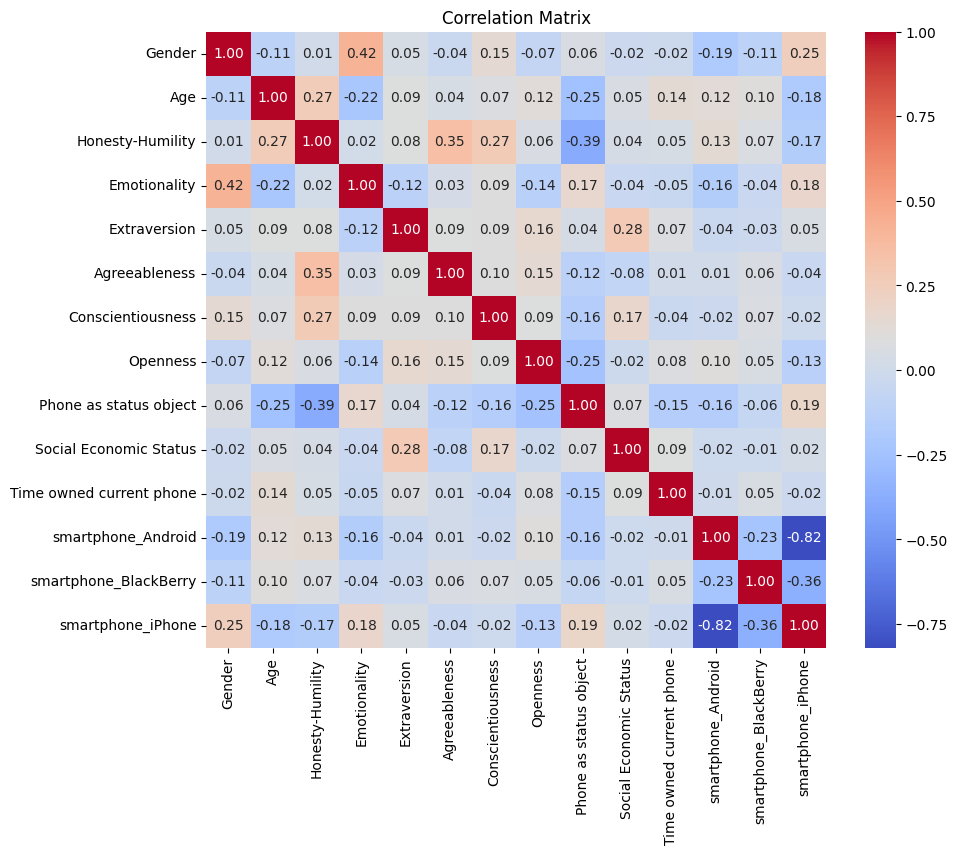

In [161]:
correlation = phone_cleaned.corr()
print("\nMatrix ความสัมพันธ์ระหว่างตัวแปร:")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

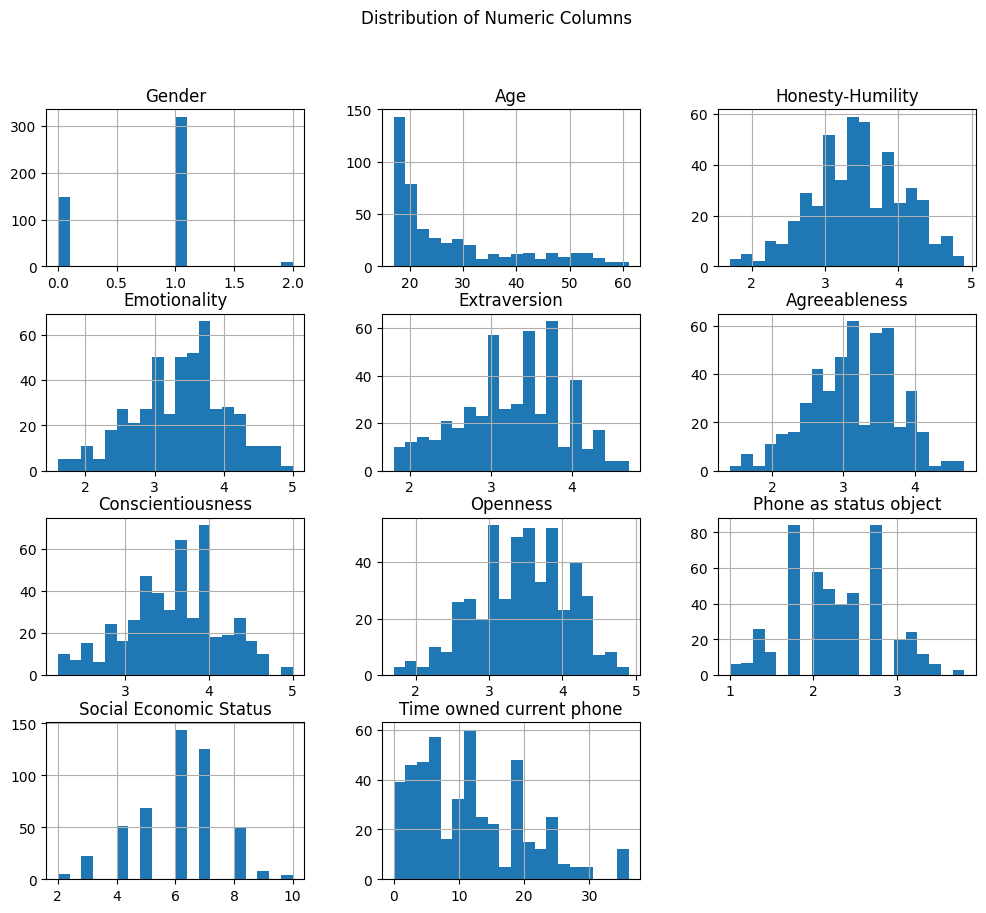

In [162]:
numeric_columns = phone_cleaned.select_dtypes(include=['float64', 'int64']).columns
phone_cleaned[numeric_columns].hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numeric Columns')
plt.show()

# Ensemble Classification via Random Forest

In [61]:
phone_cleaned

,Smartphone,Gender,Age,Honesty-Humility,Emotionality,Extraversion,Agreeableness,Conscientiousness,Openness,Phone as status object,Social Economic Status,Time owned current phone
0,iPhone,male,24.0,3.3,2.4,3.3,3.4,3.1,3.3,1.8,6.0,18.0
2,iPhone,male,31.0,3.9,2.4,2.7,4.1,3.7,4.9,1.3,2.0,22.0
3,iPhone,male,22.0,3.0,3.0,2.8,2.4,2.2,2.5,2.7,4.0,2.0
4,iPhone,male,43.0,3.6,1.8,2.0,2.6,3.9,3.1,1.2,3.0,4.0
5,iPhone,male,20.0,2.7,3.0,3.7,2.8,3.0,3.8,1.7,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
525,iPhone,other,23.0,3.6,3.7,3.7,3.8,4.5,3.9,2.2,6.0,13.0
527,iPhone,other,28.0,3.0,2.7,1.9,2.6,3.7,4.5,2.0,3.0,4.0
529,iPhone,other,18.0,2.4,3.8,3.7,3.2,3.1,4.1,2.7,6.0,10.0
530,Android,other,21.0,2.2,4.3,2.2,2.0,3.6,2.9,2.7,7.0,24.0


In [62]:
phone_cleaned['Gender'].unique()

array(['male', 'female', 'other'], dtype=object)

In [63]:
phone_cleaned['Gender'] = phone_cleaned['Gender'].map({'male':0, 'female':1, 'other':2})
phone_cleaned

,Smartphone,Gender,Age,Honesty-Humility,Emotionality,Extraversion,Agreeableness,Conscientiousness,Openness,Phone as status object,Social Economic Status,Time owned current phone
0,iPhone,0,24.0,3.3,2.4,3.3,3.4,3.1,3.3,1.8,6.0,18.0
2,iPhone,0,31.0,3.9,2.4,2.7,4.1,3.7,4.9,1.3,2.0,22.0
3,iPhone,0,22.0,3.0,3.0,2.8,2.4,2.2,2.5,2.7,4.0,2.0
4,iPhone,0,43.0,3.6,1.8,2.0,2.6,3.9,3.1,1.2,3.0,4.0
5,iPhone,0,20.0,2.7,3.0,3.7,2.8,3.0,3.8,1.7,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
525,iPhone,2,23.0,3.6,3.7,3.7,3.8,4.5,3.9,2.2,6.0,13.0
527,iPhone,2,28.0,3.0,2.7,1.9,2.6,3.7,4.5,2.0,3.0,4.0
529,iPhone,2,18.0,2.4,3.8,3.7,3.2,3.1,4.1,2.7,6.0,10.0
530,Android,2,21.0,2.2,4.3,2.2,2.0,3.6,2.9,2.7,7.0,24.0


In [64]:
phone_cleaned = pd.get_dummies(phone_cleaned, columns=['Smartphone'], prefix='smartphone')
phone_cleaned

,Gender,Age,Honesty-Humility,Emotionality,Extraversion,Agreeableness,Conscientiousness,Openness,Phone as status object,Social Economic Status,Time owned current phone,smartphone_Android,smartphone_BlackBerry,smartphone_iPhone
0,0,24.0,3.3,2.4,3.3,3.4,3.1,3.3,1.8,6.0,18.0,False,False,True
2,0,31.0,3.9,2.4,2.7,4.1,3.7,4.9,1.3,2.0,22.0,False,False,True
3,0,22.0,3.0,3.0,2.8,2.4,2.2,2.5,2.7,4.0,2.0,False,False,True
4,0,43.0,3.6,1.8,2.0,2.6,3.9,3.1,1.2,3.0,4.0,False,False,True
5,0,20.0,2.7,3.0,3.7,2.8,3.0,3.8,1.7,6.0,4.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,2,23.0,3.6,3.7,3.7,3.8,4.5,3.9,2.2,6.0,13.0,False,False,True
527,2,28.0,3.0,2.7,1.9,2.6,3.7,4.5,2.0,3.0,4.0,False,False,True
529,2,18.0,2.4,3.8,3.7,3.2,3.1,4.1,2.7,6.0,10.0,False,False,True
530,2,21.0,2.2,4.3,2.2,2.0,3.6,2.9,2.7,7.0,24.0,True,False,False


In [66]:
phone_cleaned.columns

Index(['Gender', 'Age', 'Honesty-Humility', 'Emotionality', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Openness',
       'Phone as status object', 'Social Economic Status',
       'Time owned current phone', 'smartphone_Android',
       'smartphone_BlackBerry', 'smartphone_iPhone'],
      dtype='object')

In [67]:
scalar = StandardScaler()
numeric_columns = ['Age', 'Honesty-Humility', 'Emotionality', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Openness',
       'Phone as status object', 'Social Economic Status',
       'Time owned current phone']
phone_standardize = phone_cleaned[:]
phone_standardize[numeric_columns] = scalar.fit_transform(phone_standardize[numeric_columns])
phone_standardize

,Gender,Age,Honesty-Humility,Emotionality,Extraversion,Agreeableness,Conscientiousness,Openness,Phone as status object,Social Economic Status,Time owned current phone,smartphone_Android,smartphone_BlackBerry,smartphone_iPhone
0,0,-0.347262,-0.230413,-1.459964,0.056180,0.415362,-0.858050,-0.236563,-0.820827,-0.008776,0.767589,False,False,True
2,0,0.256289,0.742721,-1.459964,-0.892130,1.554421,0.209913,2.366797,-1.691225,-2.760502,1.245082,False,False,True
3,0,-0.519706,-0.716979,-0.569338,-0.734079,-1.211866,-2.459995,-1.538243,0.745889,-1.384639,-1.142381,False,False,True
4,0,1.290948,0.256154,-2.350590,-1.998492,-0.886420,0.565901,-0.561983,-1.865304,-2.072570,-0.903634,False,False,True
5,0,-0.692149,-1.203546,-0.569338,0.688386,-0.560975,-1.036044,0.576987,-0.994907,-0.008776,-0.903634,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,2,-0.433484,0.256154,0.469725,0.688386,1.066253,1.633864,0.739697,-0.124509,-0.008776,0.170724,False,False,True
527,2,-0.002376,-0.716979,-1.014651,-2.156543,-0.886420,0.209913,1.715957,-0.472668,-2.072570,-0.903634,False,False,True
529,2,-0.864592,-1.690112,0.618163,0.688386,0.089916,-0.858050,1.065117,0.745889,-0.008776,-0.187396,False,False,True
530,2,-0.605927,-2.014490,1.360351,-1.682388,-1.862757,0.031919,-0.887403,0.745889,0.679155,1.483828,True,False,False


In [101]:
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split, GridSearchCV

X = phone_standardize.drop(columns=['Gender'])
y = phone_standardize['Gender']

X_train, Xtest, Y_train, Ytest = train_test_split(X, y, random_state=15, test_size=0.2)

In [110]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=15)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [111]:
Y_train.value_counts()

Gender
1    259
0    259
2    259
Name: count, dtype: int64

In [117]:
# define the hyperparameter grid
param_grid = {
'n_estimators': [5, 10, 40, 70, 100],
'criterion': ['gini', 'entropy', 'log_loss'],
'max_depth': [1, 5, 10, 20, 40, 80, 100],
# 'min_samples_split': [1, 2, 3, 4, 5],
# 'min_samples_leaf': [1, 2, 3, 4, 5],
# 'min_weight_fraction_leaf': [0.1, 0.25, 0.5, 0.75],
'max_features': ['sqrt', 'log2']
}

In [118]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(random_state=15)
rforest

RandomForestClassifier(random_state=15)

In [119]:
kf = StratifiedKFold(n_splits=9, random_state=15, shuffle= True)

In [120]:
# initialize GridSearchCv
grid_search = GridSearchCV(estimator=rforest, scoring='f1_macro', param_grid=param_grid, cv= kf, n_jobs= -1) 

# git the model to data
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=9, random_state=15, shuffle=True),
             estimator=RandomForestClassifier(random_state=15), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, 20, 40, 80, 100],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [5, 10, 40, 70, 100]},
             scoring='f1_macro')

In [121]:
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
print(best_params, best_rf)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 70} RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=70,
                       random_state=15)


In [122]:
# predict
ytest_pred = best_rf.predict(Xtest)
ytrain_pred = best_rf.predict(X_train)

In [123]:
# collect to best model
rforest_best = RandomForestClassifier(criterion = 'entropy', random_state=15, n_estimators=70, max_depth= 20, max_features='sqrt',min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf= 0.1)

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#ytest_pred = rforest_best.predict(Xtest)
#ytrain_pred = rforest_best.predict(X_train)

acc_rf_train = accuracy_score(Y_train, ytrain_pred)
acc_rf_test = accuracy_score(Ytest, ytest_pred)

precise_rf_train = precision_score(Y_train, ytrain_pred, average='macro')
precise_rf_test = precision_score(Ytest, ytest_pred, average='macro')

rec_rf_train = recall_score(Y_train, ytrain_pred, average='macro')
rec_rf_test = recall_score(Ytest, ytest_pred, average='macro')

f1_rf_train = f1_score(Y_train, ytrain_pred, average='macro')
f1_rf_test = f1_score(Ytest, ytest_pred, average='macro')


print(f"accuracy of Random Forest for train when consider SEX is {acc_rf_train:.4f}")
print(f"accuracy of Random Forest for test when consider SEX is {acc_rf_test:.4f}")

print(f"precision of Random Forest for train when consider SEX is {precise_rf_train:.4f}")
print(f"precision of Random Forest for test when consider SEX is {precise_rf_test:.4f}")

print(f"recall of Random Forest for train when consider SEX is {rec_rf_train:.4f}")
print(f"recall of Random Forest for test when consider SEX is {rec_rf_test:.4f}")

print(f"f1 of Random Forest for train when consider SEX is {f1_rf_train:.4f}")
print(f"f1 of Random Forest for test when consider SEX is {f1_rf_test:.4f}")



accuracy of Random Forest for train when consider SEX is 1.0000
accuracy of Random Forest for test when consider SEX is 0.6771
precision of Random Forest for train when consider SEX is 1.0000
precision of Random Forest for test when consider SEX is 0.4405
recall of Random Forest for train when consider SEX is 1.0000
recall of Random Forest for test when consider SEX is 0.4542
f1 of Random Forest for train when consider SEX is 1.0000
f1 of Random Forest for test when consider SEX is 0.4469


In [125]:
Ytest

285    1
301    1
248    1
410    1
383    1
      ..
12     0
249    1
134    0
118    0
206    1
Name: Gender, Length: 96, dtype: int64

Text(0.5, 23.52222222222222, 'Predicted Species')

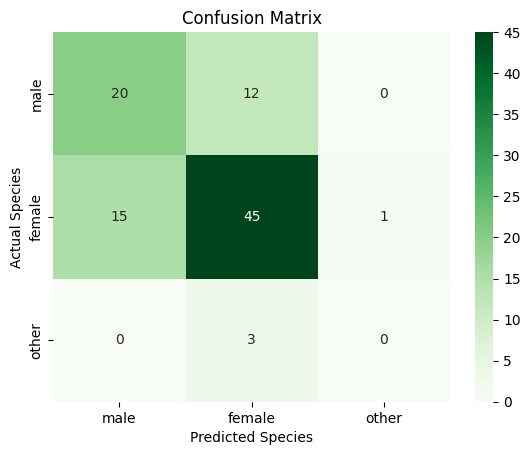

In [126]:
conf = confusion_matrix(Ytest, ytest_pred, labels = [0,1,2])

plt.figure()
sns.heatmap(conf, annot=True, xticklabels= ['male', 'female', 'other'], fmt="d", yticklabels=['male', 'female', 'other'], cmap='Greens')
plt.title("Confusion Matrix")
plt.ylabel("Actual Species")
plt.xlabel("Predicted Species")

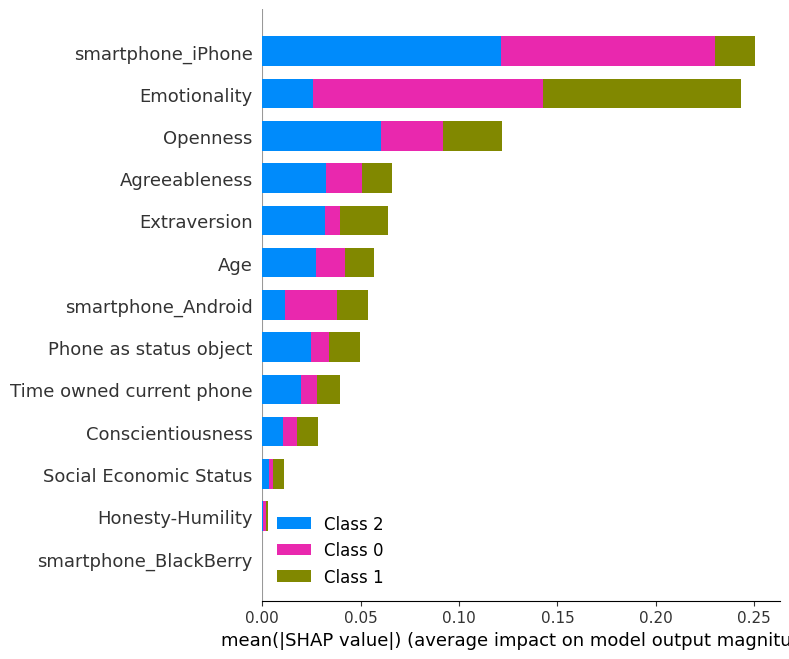

In [127]:
import shap

# use the best model to see SHAP
rforest_shap = RandomForestClassifier(criterion = 'gini', random_state=15, n_estimators=5, max_depth= 5, max_features='sqrt',min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf= 0.1)
rforest_shap.fit(X_train, Y_train)

# use TreeExplainer to help me interplet
explainer = shap.TreeExplainer(rforest_shap)

shap_values = explainer.shap_values(Xtest)

shap.summary_plot(shap_values, Xtest, plot_type = 'bar', feature_names = Xtest.columns)


# KNeighborsClassifier

In [128]:
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split, GridSearchCV

X = phone_standardize.drop(columns=['Gender'])
y = phone_standardize['Gender']

Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, random_state=15, test_size=0.2)

In [129]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=15)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [130]:
from sklearn.neighbors import KNeighborsClassifier 

kf = StratifiedKFold(n_splits=9, random_state=10, shuffle= True)

max_k = 15

training_f1 = [[] for _ in range(max_k)]
validation_f1 = [[] for _ in range(max_k)]

# loop over the values of k
for k in range(max_k):

    knn = KNeighborsClassifier(n_neighbors= k+1)
    # loop over the cross-validation splits
    for train_index, val_index in kf.split(Xtr, Ytr):

        Xtrain, Xval = Xtr.iloc[train_index], Xtr.iloc[val_index]
        Ytrain, Yval = Ytr.iloc[train_index], Ytr.iloc[val_index]
        model = knn.fit(Xtrain, Ytrain)

        pred_train = model.predict(Xtrain)
        pred_val = model.predict(Xval)

        # calculate training and validation f1 and store 
        training_f1[k].append(f1_score(Ytrain, pred_train, average='macro'))
        validation_f1[k].append(f1_score(Yval, pred_val, average='macro'))
        
        
# calculate the mean training and validation f1 across splits for each k
train_f1_mean = np.mean(training_f1, axis=1)
validation_f1_mean = np.mean(validation_f1, axis=1)



/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=9.
  warnings.warn(
/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=9.
  warnings.warn(
/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=9.
  warnings.warn(
/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=9.
  warnings.warn(
/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning:

Text(0, 0.5, 'F1 Score')

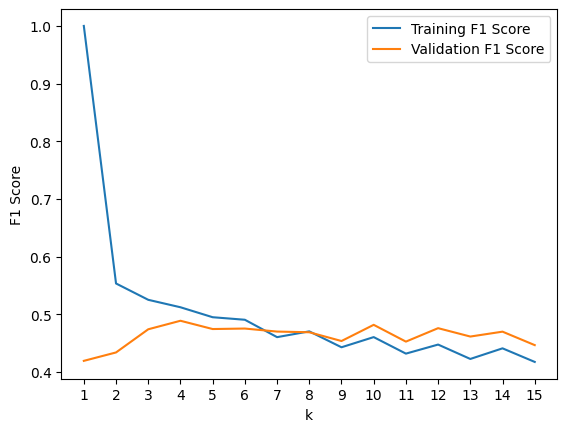

In [131]:
# plot the mean training and validation f1 against each value of k
fig, ax = plt.subplots()
ax.plot(np.arange(1,max_k+1), train_f1_mean, label='Training F1 Score')
ax.plot(np.arange(1,max_k+1), validation_f1_mean, label='Validation F1 Score')
plt.legend()
plt.xlabel('k')
ax.set_xticks(np.arange(1, max_k+1))
plt.ylabel('F1 Score')

In [132]:
knn_tune_by_hand = KNeighborsClassifier(n_neighbors=8)
# fit on the training data
knn_tune_by_hand.fit(Xtr, Ytr)
# prediction on the test data
ytest_pred = knn_tune_by_hand.predict(Xtest)
ytrain_pred = knn_tune_by_hand.predict(Xtr)

In [133]:
acc_knn_train_sex = accuracy_score(Ytr, ytrain_pred)
acc_knn_test_sex = accuracy_score(Ytest, ytest_pred)


precise_knn_train_sex = precision_score(Ytr, ytrain_pred, average='macro')
precise_knn_test_sex = precision_score(Ytest, ytest_pred, average='macro')

rec_knn_train_sex = recall_score(Ytr, ytrain_pred, average='macro')
rec_knn_test_sex = recall_score(Ytest, ytest_pred, average='macro')

f1_knn_train_sex = f1_score(Ytr, ytrain_pred, average='macro')
f1_knn_test_sex = f1_score(Ytest, ytest_pred, average='macro')

print(f"accuracy of KNeighbors Classifier for train when consider SEX is {acc_knn_train_sex:.4f}")
print(f"accuracy of KNeighbors Classifier for test when consider SEX is {acc_knn_test_sex:.4f}")

print(f"precision of KNeighbors Classifier for train when consider SEX is {precise_knn_train_sex:.4f}")
print(f"precision of KNeighbors Classifier for test when consider SEX is {precise_knn_test_sex:.4f}")

print(f"recall of KNeighbors Classifier for train when consider SEX is {rec_knn_train_sex:.4f}")
print(f"recall of KNeighbors Classifier for test when consider SEX is {rec_knn_test_sex:.4f}")

print(f"f1 of KNeighbors Classifier for train when consider SEX is {f1_knn_train_sex:.4f}")
print(f"f1 of KNeighbors Classifier for test when consider SEX is {f1_knn_test_sex:.4f}")



accuracy of KNeighbors Classifier for train when consider SEX is 0.7717
accuracy of KNeighbors Classifier for test when consider SEX is 0.6458
precision of KNeighbors Classifier for train when consider SEX is 0.5002
precision of KNeighbors Classifier for test when consider SEX is 0.4022
recall of KNeighbors Classifier for train when consider SEX is 0.4656
recall of KNeighbors Classifier for test when consider SEX is 0.3982
f1 of KNeighbors Classifier for train when consider SEX is 0.4730
f1 of KNeighbors Classifier for test when consider SEX is 0.3942


/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [166]:
kf = StratifiedKFold(n_splits=9, random_state=15, shuffle= True)

param_grid = {
    'n_neighbors': list(range(1, 20)), 
    #'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': list(range(30, 100)),
    'weights': ['uniform', 'distance']
    
}

knn_turn_grid = KNeighborsClassifier()
grid_search = GridSearchCV(knn_turn_grid, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1)
grid_search.fit(Xtr, Ytr)

print(f'best parameters: {grid_search.best_params_}')
print(f'best F1 score: {grid_search.best_score_}')

/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=9.
  warnings.warn(


KeyboardInterrupt: 

In [135]:
best_params_knn_sex = grid_search.best_params_
print(best_params_knn_sex)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}


In [167]:
# set parameter based on better score
knn_tune_best = KNeighborsClassifier(n_neighbors= 6, algorithm = 'auto', leaf_size=30, p=2, weights = 'distance')
# fit on the training data
knn_tune_best.fit(Xtr, Ytr)

ytest_pred = knn_tune_best.predict(Xtest)
ytrain_pred = knn_tune_best.predict(Xtr)

In [168]:
acc_knn_train_sex = accuracy_score(Ytr, ytrain_pred)
acc_knn_test_sex = accuracy_score(Ytest, ytest_pred)


precise_knn_train_sex = precision_score(Ytr, ytrain_pred, average='macro')
precise_knn_test_sex = precision_score(Ytest, ytest_pred, average='macro')

rec_knn_train_sex = recall_score(Ytr, ytrain_pred, average='macro')
rec_knn_test_sex = recall_score(Ytest, ytest_pred, average='macro')

f1_knn_train_sex = f1_score(Ytr, ytrain_pred, average='macro')
f1_knn_test_sex = f1_score(Ytest, ytest_pred, average='macro')


print(f"accuracy of KNeighbors Classifier for train when consider SEX is {acc_knn_train_sex:.4f}")
print(f"accuracy of KNeighbors Classifier for test when consider SEX is {acc_knn_test_sex:.4f}")

print(f"precision of KNeighbors Classifier for train when consider SEX is {precise_knn_train_sex:.4f}")
print(f"precision of KNeighbors Classifier for test when consider SEX is {precise_knn_test_sex:.4f}")

print(f"recall of KNeighbors Classifier for train when consider SEX is {rec_knn_train_sex:.4f}")
print(f"recall of KNeighbors Classifier for test when consider SEX is {rec_knn_test_sex:.4f}")

print(f"f1 of KNeighbors Classifier for train when consider SEX is {f1_knn_train_sex:.4f}")
print(f"f1 of KNeighbors Classifier for test when consider SEX is {f1_knn_test_sex:.4f}")



accuracy of KNeighbors Classifier for train when consider SEX is 1.0000
accuracy of KNeighbors Classifier for test when consider SEX is 0.7447
precision of KNeighbors Classifier for train when consider SEX is 1.0000
precision of KNeighbors Classifier for test when consider SEX is 0.4714
recall of KNeighbors Classifier for train when consider SEX is 1.0000
recall of KNeighbors Classifier for test when consider SEX is 0.4583
f1 of KNeighbors Classifier for train when consider SEX is 1.0000
f1 of KNeighbors Classifier for test when consider SEX is 0.4612


/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 23.52222222222222, 'Predicted Species')

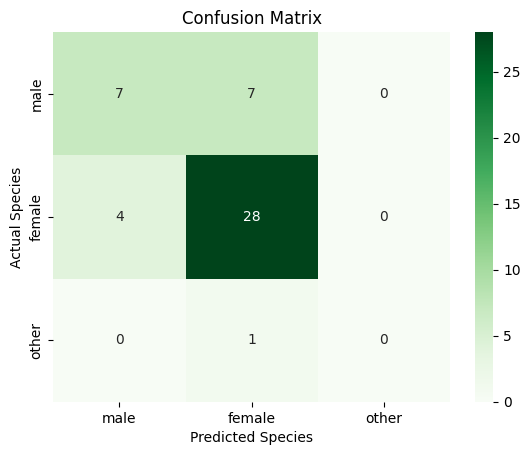

In [169]:
conf = confusion_matrix(Ytest, ytest_pred, labels = [0,1,2])

plt.figure()
sns.heatmap(conf, annot=True, xticklabels= ['male', 'female', 'other'], fmt="d", yticklabels=['male', 'female', 'other'], cmap='Greens')
plt.title("Confusion Matrix")
plt.ylabel("Actual Species")
plt.xlabel("Predicted Species")

Using 381 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 96/96 [05:43<00:00,  3.58s/it]


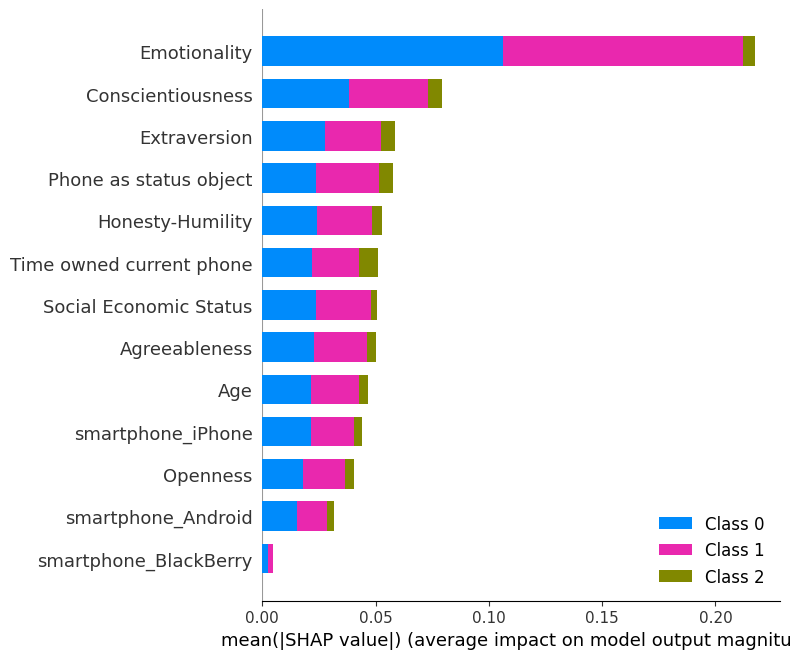

In [139]:
# use KernelExplainer to help interpret
explainer = shap.KernelExplainer(knn_tune_best.predict_proba, Xtr) 

# SHAP values
shap_values = explainer.shap_values(Xtest)

shap.summary_plot(shap_values, Xtest, plot_type = 'bar', feature_names = Xtest.columns)


# Based line model


In [149]:
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split, GridSearchCV

X = phone_standardize.drop(columns=['Gender'])
y = phone_standardize['Gender']

Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, random_state=15, test_size=0.2)

In [150]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=15)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [151]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent', random_state=15) # to predict most frequent class
dummy_clf.fit(Xtr, Ytr)

dummy_pred_train = dummy_clf.predict(Xtr)
dummy_pred_test = dummy_clf.predict(Xtest)

In [152]:
acc_dummy_train_sex = accuracy_score(Ytr, dummy_pred_train)
acc_dummy_test_sex = accuracy_score(Ytest, dummy_pred_test)


precise_dummy_train_sex = precision_score(Ytr, dummy_pred_train, average='macro', zero_division=0)
precise_dummy_test_sex = precision_score(Ytest, dummy_pred_test, average='macro', zero_division=0)

rec_dummy_train_sex = recall_score(Ytr, dummy_pred_train, average='macro')
rec_dummy_test_sex = recall_score(Ytest, dummy_pred_test, average='macro')

f1_dummy_train_sex = f1_score(Ytr, dummy_pred_train, average='macro')
f1_dummy_test_sex = f1_score(Ytest, dummy_pred_test, average='macro')


print(f"accuracy of Based line model for train when consider SEX is {acc_dummy_train_sex:.4f}")
print(f"accuracy of Based linemodel for test when consider SEX is {acc_dummy_test_sex:.4f}")

print(f"precision of Based line model for train when consider SEX is {precise_dummy_train_sex:.4f}")
print(f"precision of Based line model for test when consider SEX is {precise_dummy_test_sex:.4f}")

print(f"recall of Based line model for train when consider SEX is {rec_dummy_train_sex:.4f}")
print(f"recall of Based line model for test when consider SEX is {rec_dummy_test_sex:.4f}")

print(f"f1 of Based line model for train when consider SEX is {f1_dummy_train_sex:.4f}")
print(f"f1 of Based line model for test when consider SEX is {f1_dummy_test_sex:.4f}")

accuracy of Based line model for train when consider SEX is 0.6798
accuracy of Based linemodel for test when consider SEX is 0.6354
precision of Based line model for train when consider SEX is 0.2266
precision of Based line model for test when consider SEX is 0.2118
recall of Based line model for train when consider SEX is 0.3333
recall of Based line model for test when consider SEX is 0.3333
f1 of Based line model for train when consider SEX is 0.2698
f1 of Based line model for test when consider SEX is 0.2590


Text(0.5, 23.52222222222222, 'Predicted Species')

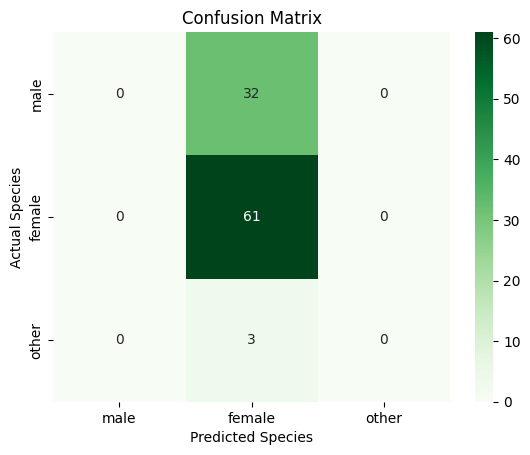

In [154]:
conf = confusion_matrix(Ytest, dummy_pred_test, labels = [0,1,2])

plt.figure()
sns.heatmap(conf, annot=True, xticklabels= ['male', 'female', 'other'], fmt="d", yticklabels=['male', 'female', 'other'], cmap='Greens')
plt.title("Confusion Matrix")
plt.ylabel("Actual Species")
plt.xlabel("Predicted Species")

In [155]:
# T-test
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split, GridSearchCV

X = phone_standardize.drop(columns=['Gender'])
y = phone_standardize['Gender']

Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, random_state=15, test_size=0.2)

cv = StratifiedKFold(n_splits=10, random_state=15, shuffle=True) 

f1scores_basedline = []
f1scores_random = []
f1scores_knn = []


for train_index, test_index in cv.split(X, y):
    Xtr, Xtest = X.iloc[train_index], X.iloc[test_index]
    Ytr, Ytest = y.iloc[train_index], y.iloc[test_index]
    
    modelknn = knn_tune_best.fit(Xtr, Ytr)
    modeldumm = dummy_clf.fit(Xtr, Ytr)
    modelrandom = rforest_best.fit(Xtr, Ytr)
    
    Ypredknn = modelknn.predict(Xtest)
    Ypreddumm = modeldumm.predict(Xtest)
    Ypredrandom = modelrandom.predict(Xtest)
    
    f1scores_knn.append(f1_score(Ytest, Ypredknn, average='macro'))
    f1scores_basedline.append(f1_score(Ytest, Ypreddumm, average='macro'))
    f1scores_random.append(f1_score(Ytest, Ypredrandom, average='macro'))

# test
f1scores_knn

/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


[0.3274647887323944,
 0.4134460547504026,
 0.3904761904761905,
 0.3638095238095238,
 0.3972543972543973,
 0.4473493100944081,
 0.3904761904761905,
 0.6834047764849969,
 0.37308488612836443,
 0.4611764705882353]

In [156]:
print(f"knn: mean={np.mean(f1scores_knn):.4f}, std={np.std(f1scores_knn):.4f}")
print(f"randomforest: mean={np.mean(f1scores_random):.4f}, std={np.std(f1scores_random):.4f}")
print(f"basedline: mean={np.mean(f1scores_basedline):.4f}, std={np.std(f1scores_basedline):.4f}")

knn: mean=0.4248, std=0.0937
randomforest: mean=0.4086, std=0.0705
basedline: mean=0.2812, std=0.0413


In [147]:
from scipy.stats import ttest_rel

tstat_knn_random, pval_knn_random = ttest_rel(f1scores_knn, f1scores_random)
tstat_knn_baseline, pval_knn_baseline = ttest_rel(f1scores_knn, f1scores_basedline)
tstat_random_baseline, pval_random_baseline = ttest_rel(f1scores_random, f1scores_basedline)

print(f"KNN vs Random Forest: t-statistic={tstat_knn_random:.2f}, p-value={pval_knn_random:.3f}")
print(f"KNN vs Baseline: t-statistic={tstat_knn_baseline:.2f}, p-value={pval_knn_baseline:.3f}")
print(f"Random Forest vs Baseline: t-statistic={tstat_random_baseline:.2f}, p-value={pval_random_baseline:.3f}")


KNN vs Random Forest: t-statistic=0.83, p-value=0.430
KNN vs Baseline: t-statistic=7.45, p-value=0.000
Random Forest vs Baseline: t-statistic=10.22, p-value=0.000
